# Representing texts in features

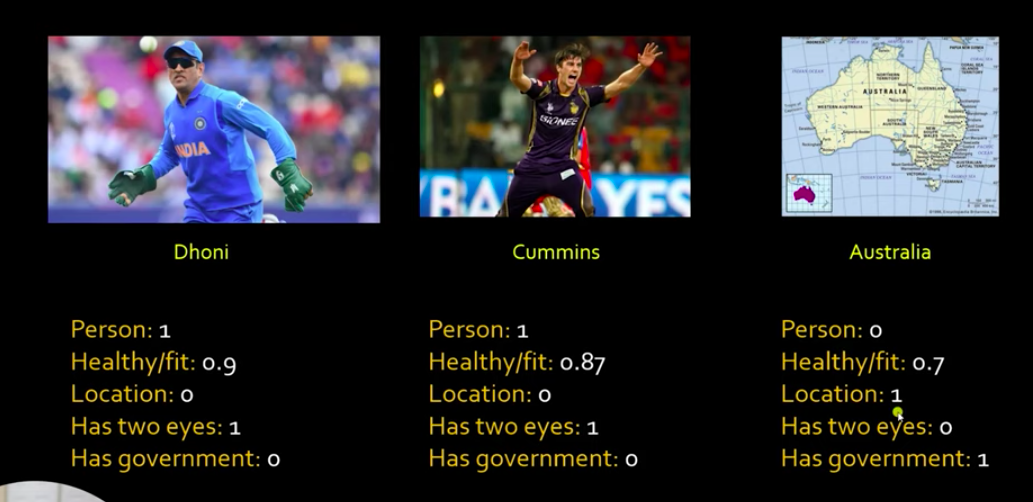

- Every word will be evaluated on diff. features
- So each word will be represented with 'feature vector'

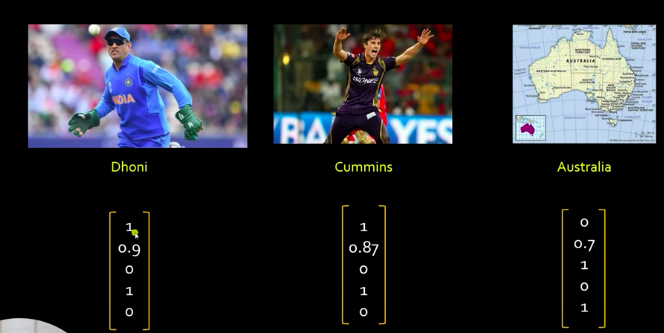

- The advantage of representing the words in form of vectors is that you can do lot of mathematical operations like cosine similarity
- So now when we compare Dhoni and Cummins there will be a lot of cosine similarities or similar representation in terms of numbers.

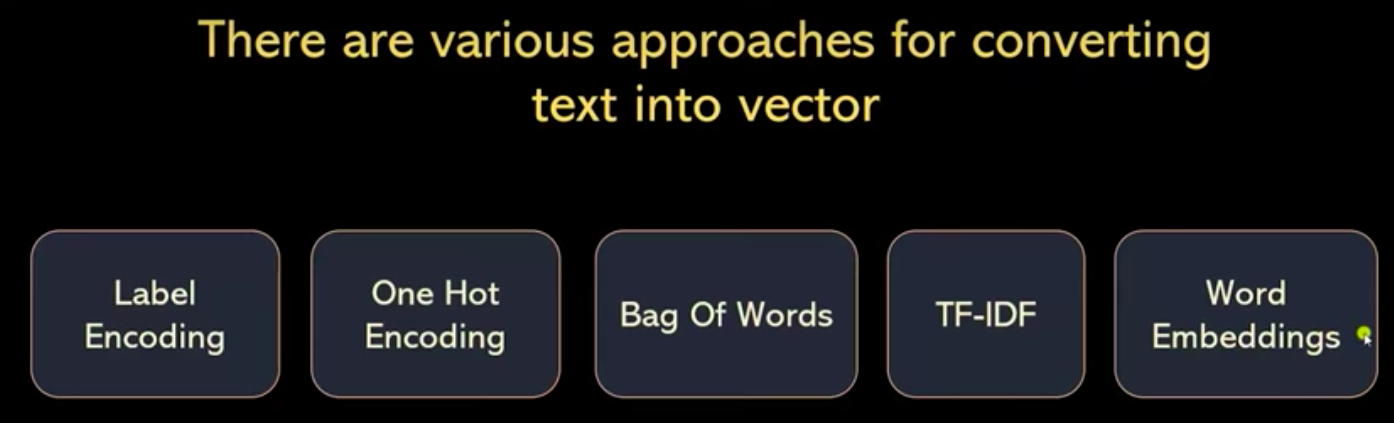

# Representing text in form of Numbers

### Approach 1 : LABEL ENCODING

- The simple approach in solving any NLP task is to convert it the raw text into vectors and then use any machine learning model to classify the text
- 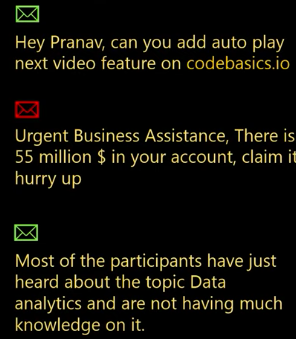




- Let's say you have a set a words .So classify them the first step would be to create an vocabulary.
- Vocabulary is basically collection of all unique words in the given text data
- Then we will assign a unique number to each word.
- Using this vocabulary you can represent texts in form of vectors

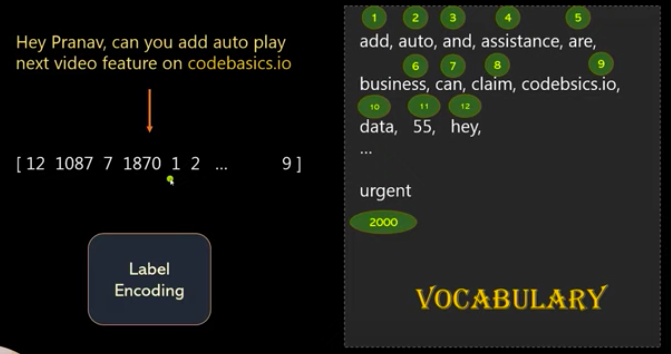

### Approach 2 :ONE HOT ENCODING




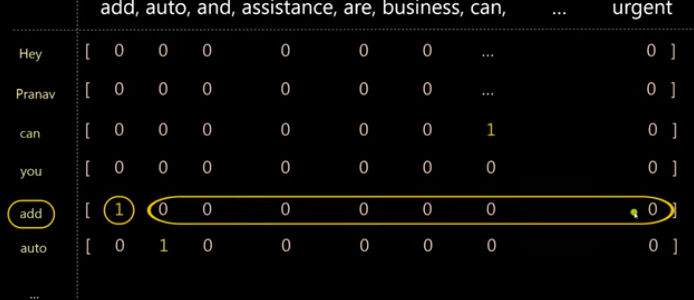

- Take a list of all the words who are part of your vocabulary.
- Take your text of which you want to convert into vector.
- For every present word in the text ,that position in the vocabulary is assigned with 1 and remaining words will have 0.
- **Disadvantage**
1. or similar contextual words it will use different position vectors like help and assistance.
2.  Also let's say that vocabulary is of size 100k. SO each word vector representation will occupy 100k words space which is too much of memory.
  - Every word which is not in vocabulary faces can be defined as "undefined" but then every word which is not in vocabulary will have same representation.
  - So we face OOV problem.

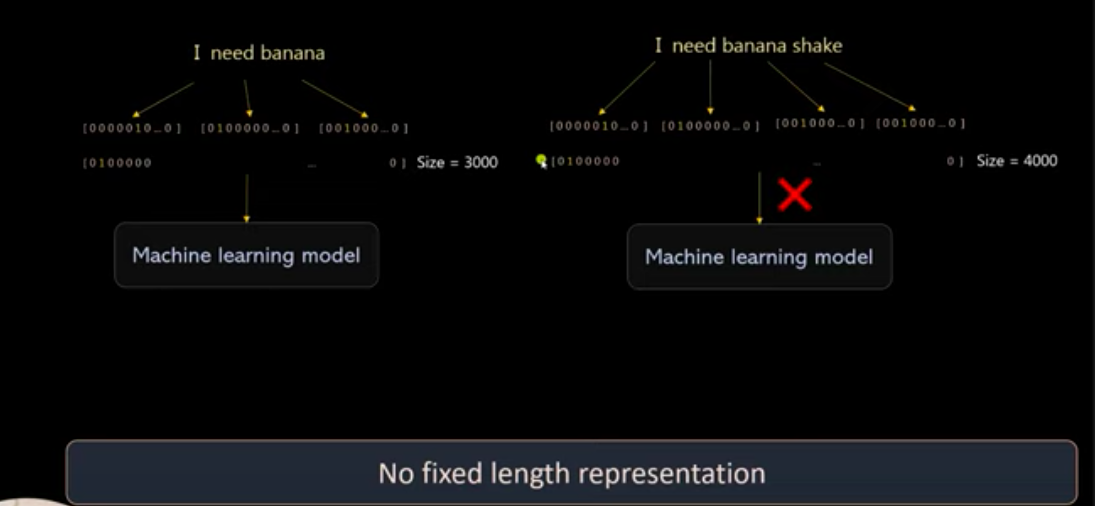

3. Let's say I have an sentence "I need banana" and I created one-hot encoding vector and created an flattened list.
  - But all sentence can't be of same length.Let's the other one is "I need banana shake.
  - So it's length will be different.
  - But the machine learning model expects similar size data.
  - When you are training your neural network .it expects the input size to be equal.
  

# BAG OF WORDS

- Bag of words (BoW) is a commonly used technique in natural language processing (NLP) and information retrieval.

-  It is a simple and flexible method for representing text data as numerical vectors, which can be used for various text analysis tasks, such as document classification, sentiment analysis, and information retrieval.

- In the bag of words model, a text document is represented as an unordered collection, or "bag," of words, disregarding grammar and word order.
-  The model assumes that the presence of words in a document is more important than their order or context.

The basic steps of creating a bag of words representation are as follows:

1. Tokenization: The document is divided into individual words or terms, known as tokens. Punctuation marks, numbers, and other non-essential elements are often removed.

2. Vocabulary Construction: The unique tokens across all documents are collected to form the vocabulary. Each token typically represents a single word, but it can also be a combination of words, such as "New York."

3. Counting Occurrences: For each document, the frequency of each token in the vocabulary is counted. This information is often represented in a matrix known as the term-document matrix, where each row corresponds to a document, each column corresponds to a token, and each entry represents the count of the token in the respective document.

4. Vectorization: The term-document matrix can be further transformed into a numerical vector representation, where each document is represented as a vector of token counts. These vectors can be used as input to machine learning algorithms for various text analysis tasks.

The bag of words model has several limitations. It ignores the order of words and does not capture the semantic meaning or context of the text. Additionally, it treats each word as independent, disregarding relationships and dependencies between words. However, despite these limitations, the bag of words model remains a widely used and effective technique for many text analysis tasks.

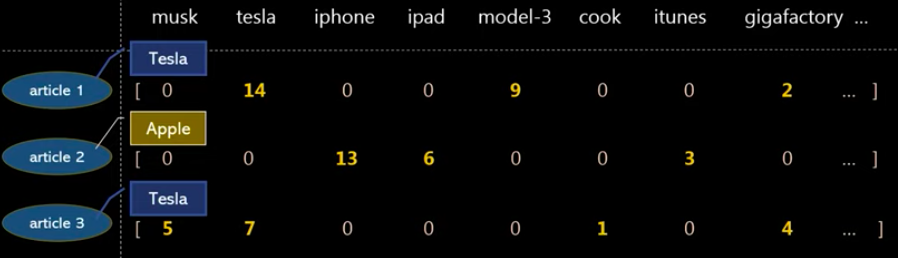

- So basically you are counting the occurence of any word in of vocabulary in the sentence
- So the occurence and the frequency of the words help us to determine fearures in the documnets.
- For ex- occurence of iphone and itunes multiple times in document indicates that this document is about Apple.

- **Disadvantages**

- Every word representation will be of length of vocabulary.
- Doesn't helps in capturing the contextual meaning of words.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CodeBasics/NLP/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

## creating a new numericaal column representing spam and ham

In [ ]:
df['spam']=df['Category'].apply(lambda x:1 if x=="spam" else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


#Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.spam,test_size=0.2)

In [ ]:
X_train.shape

(4457,)

In [ ]:
X_test.shape

(1115,)

In [ ]:
X_train[:4]

4196    Double mins and txts 4 6months FREE Bluetooth ...
4712    Huh so slow i tot u reach long ago liao... U 2...
4515           Sure, whenever you show the fuck up &gt;:(
3685                           Dad says hurry the hell up
Name: Message, dtype: object

In [ ]:
X_train[2962]

"I'm doing da intro covers energy trends n pros n cons... Brief description of nuclear fusion n oso brief history of iter n jet got abt 7 n half pages.."

In [ ]:
y_train[:4]

4196    1
4712    0
4515    0
3685    0
Name: spam, dtype: int64

# CountVectorizer

CountVectorizer is a text preprocessing technique commonly used in natural language processing (NLP) and machine learning tasks. It is a feature extraction method that converts a collection of text documents into a matrix of token counts. This matrix represents the occurrence of each token (word or n-gram) in the documents.

The CountVectorizer works by following a simple process:

1. Tokenization: It breaks down the text into individual words or tokens. It removes punctuation marks, converts the text to lowercase, and splits it based on whitespace.

2. Counting: It counts the occurrence of each token in the text and creates a vocabulary, which is essentially a dictionary of all the unique tokens.

3. Vectorization: It transforms the text into a matrix representation, where each row corresponds to a document, and each column represents a token. The value in each cell represents the count of the corresponding token in the respective document.

For example, let's say we have three documents:
```
Document 1: "This is the first document."
Document 2: "This document is the second document."
Document 3: "And this is the third one."
```

After applying CountVectorizer, the resulting matrix would look like this:

```
          this  is  the  first  document  second  and  third  one
Document 1   1   1    1      1         1       0    0      0    0
Document 2   1   1    2      0         2       1    0      0    0
Document 3   1   1    0      0         0       0    1      1    1
```

The columns represent the unique tokens, and the values in each cell represent the count of the token in the respective document.

- CountVectorizer is a simple and efficient technique that provides a numerical representation of text data, allowing machine learning algorithms to work with text data effectively.
- It is often used as a preprocessing step before applying machine learning algorithms for tasks such as text classification, clustering, or information retrieval.

- CountVectorizer extends the basic Bag of Words model by considering the frequency of words in each document
- Instead of just representing the presence or absence of words, it provides the count of each token, capturing some level of information about the importance of words within the text.

- In summary, Bag of Words is a broader concept that represents text as an unordered collection of words, while CountVectorizer is a specific implementation of the Bag of Words model that considers the frequency of words in each document, resulting in a matrix of token counts.
- CountVectorizer is a commonly used tool to create a Bag of Words representation in scikit-learn.

In [ ]:
print(X_train)

4196    Double mins and txts 4 6months FREE Bluetooth ...
4712    Huh so slow i tot u reach long ago liao... U 2...
4515           Sure, whenever you show the fuck up &gt;:(
3685                           Dad says hurry the hell up
3518    So you think i should actually talk to him? No...
                              ...                        
5157                              K k:) sms chat with me.
3106                           Or remind me in a few hrs.
3980    CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
574                                Waiting for your call.
4900      Haha, that was the first person I was gonna ask
Name: Message, Length: 4457, dtype: object


In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
print(X_train.values)

['Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX'
 'Huh so slow i tot u reach long ago liao... U 2 more days only i 4 more leh...'
 'Sure, whenever you show the fuck up &gt;:(' ...
 'CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C YA 2MORO! WHO NEEDS BLOKES'
 'Waiting for your call.'
 'Haha, that was the first person I was gonna ask']


In [ ]:
type(X_train.values)

numpy.ndarray

- If you see above X_train is in form of Series.
- Instead of that we will use X_train.vales since it is in form of numpy array

#Create bag of words representation using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v= CountVectorizer()

#generating bag of word model for X_train
X_train_cv= v.fit_transform(X_train.values) #using .values so that it creates numpy array
X_train_cv

<4457x7740 sparse matrix of type '<class 'numpy.int64'>'
	with 59411 stored elements in Compressed Sparse Row format>

In [ ]:
#converting matrix into array

X_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train_cv.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train_cv.shape

(4457, 7740)

In [ ]:
#printing the entire vocabulary

v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [ ]:
v.get_feature_names_out()[900:1000]

array(['alive', 'all', 'allah', 'allalo', 'allday', 'alle', 'allo',
       'allow', 'allowed', 'allows', 'almost', 'alone', 'along', 'alot',
       'already', 'alright', 'alrite', 'also', 'alter', 'although',
       'aluable', 'always', 'alwys', 'am', 'amazing', 'ambitious',
       'american', 'ami', 'amk', 'amla', 'amma', 'ammo', 'amnow', 'among',
       'amongst', 'amore', 'amount', 'amp', 'amplikater', 'amrca',
       'amrita', 'amt', 'amused', 'amy', 'an', 'ana', 'anand', 'and',
       'andre', 'andres', 'andrews', 'andros', 'angels', 'angry',
       'animal', 'animation', 'anjie', 'anjola', 'anna', 'annie',
       'anniversary', 'annoncement', 'announced', 'announcement',
       'annoyin', 'annoying', 'anonymous', 'anot', 'another', 'ans',
       'ansr', 'answer', 'answered', 'answerin', 'answering', 'answers',
       'answr', 'antelope', 'antha', 'anthony', 'anti', 'antibiotic',
       'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anyplaces',
       'anythiing', 'anythin', 'a

In [ ]:
#print the length of vocabulary

v.get_feature_names_out().shape

(7740,)

In [ ]:
#dir(v)   #helps to get the list of all functions associated

#gives the position of each word in the vocabulary
v.vocabulary_

{'double': 2413,
 'mins': 4464,
 'and': 947,
 'txts': 7090,
 '6months': 593,
 'free': 2965,
 'bluetooth': 1392,
 'on': 4904,
 'orange': 4951,
 'available': 1140,
 'sony': 6304,
 'nokia': 4767,
 'motorola': 4563,
 'phones': 5166,
 'call': 1592,
 'mobileupd8': 4514,
 '08000839402': 47,
 'or': 4947,
 'call2optout': 1594,
 'n9dx': 4638,
 'huh': 3521,
 'so': 6266,
 'slow': 6217,
 'tot': 6981,
 'reach': 5573,
 'long': 4172,
 'ago': 855,
 'liao': 4073,
 'more': 4549,
 'days': 2168,
 'only': 4916,
 'leh': 4052,
 'sure': 6616,
 'whenever': 7479,
 'you': 7697,
 'show': 6108,
 'the': 6800,
 'fuck': 3014,
 'up': 7172,
 'gt': 3244,
 'dad': 2132,
 'says': 5917,
 'hurry': 3532,
 'hell': 3381,
 'think': 6832,
 'should': 6102,
 'actually': 786,
 'talk': 6687,
 'to': 6920,
 'him': 3415,
 'not': 4793,
 'his': 3418,
 'boss': 1426,
 'in': 3613,
 'morning': 4552,
 'went': 7456,
 'this': 6841,
 'place': 5205,
 'last': 4002,
 'year': 7673,
 'he': 3353,
 'told': 6937,
 'me': 4375,
 'where': 7482,
 'could': 201

In [ ]:
v.get_feature_names_out()[1000] #printing the word assigned at position 1000

'apo'

In [ ]:
#converting the matrix to numpy array

X_train_np=X_train_cv.toarray()
X_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Finding the index where X_train_np != 0

np.where(X_train_np[0]!= 0)

(array([  47,  593,  947, 1140, 1392, 1592, 1594, 2413, 2965, 4464, 4514,
        4563, 4638, 4767, 4904, 4947, 4951, 5166, 6304, 7090]),)

In [ ]:
X_train[:4]

4196    Double mins and txts 4 6months FREE Bluetooth ...
4712    Huh so slow i tot u reach long ago liao... U 2...
4515           Sure, whenever you show the fuck up &gt;:(
3685                           Dad says hurry the hell up
Name: Message, dtype: object

In [ ]:
X_train[:4][4196]

'Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX'

In [ ]:
X_train_np[0][47]

1

#Train the naive bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model= MultinomialNB()
model.fit(X_train_cv,y_train)


MultinomialNB()

In [ ]:
#testing the model
#Since we our test data is in test form we have to tranform it into vector form as of training data.
#So we will use transform method

X_test_cv=v.transform(X_test)

#Evaluate Performance

In [ ]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test_cv)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       959
           1       0.95      0.90      0.92       156

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Using a sample text to check the accuracy of the model

In [ ]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

#Train the model using sklearn pipeline and reduce number of lines of code

In [ ]:
from sklearn.pipeline import Pipeline

clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())

              ])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
y_pred=clf.predict(X_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       959\n           1       0.95      0.90      0.92       156\n\n    accuracy                           0.98      1115\n   macro avg       0.97      0.95      0.96      1115\nweighted avg       0.98      0.98      0.98      1115\n'